# Notebook to summarise demographics info of the whole cohort  

In [1]:
import os
import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches

In [2]:
meld_bids_folder = '/home/mathilde/Documents/RDS/MELD_FE/DATA'

site_paths = glob.glob(os.path.join(meld_bids_folder,'MELD_*'))

print(site_paths)

['/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H2', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H5', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H101', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H28', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H4', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H21', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H5_old', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H103', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H108', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H19', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H45', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H16', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H102', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H104', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H115', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H47', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H14', '/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H10', '/home/mathilde/Docum

In [3]:
# concatenate all the demographic

df = pd.DataFrame()
for site_path in site_paths:
    site_code = os.path.basename(site_path).split('MELD_')[-1]
    if 'old' in site_code:
        print(f'Not taken in consideration because old data {site_path}')
        continue
    demographic_files = glob.glob(os.path.join(site_path,f'MELD_participants_infos_{site_code}_*.csv'))
    #get QC files
    demographic_files = [s for s in demographic_files if 'QC' not in s]
    if demographic_files == []:
        print(f'No demographic file for site {site_path}')
    elif len(demographic_files) == 1:
        demographic_file = demographic_files[0]
        if os.path.isfile(demographic_file):
            df_site = pd.read_csv(demographic_file)
            df = pd.concat([df, df_site])
        else:
            print(f'{site_code} does not have a demographic files')
    else:
        print(f'There are multiple demographic file at {site_path}')

Not taken in consideration because old data /home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_H5_old
No demographic file for site /home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_participants_info_template


In [4]:
df.head()

,id,included,reason exclusion,old ID,redcap_data_access_group,site,patient_control,sex,radiology,radiology_report,...,Notes lesion mask,lesion_mask.1,what still need to be retrieved,age_t1_preop,notes,Unnamed: 57,Unnamed: 58,reason_exclusion,Unnamed: 54,reason exlusion
0,MELD_H2_P_0001,1,NaN,NaN,h2,H2,1.0,1.0,10.0,right HS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MELD_H2_P_0002,1,NaN,NaN,h2,H2,1.0,1.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MELD_H2_P_0003,1,NaN,NaN,h2,H2,1.0,1.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MELD_H2_P_0004,1,NaN,NaN,h2,H2,1.0,1.0,13.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MELD_H2_P_0005,1,NaN,NaN,h2,H2,1.0,0.0,23.0,astrocytopathy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.reset_index()

In [6]:
# only select subjects included 
subdf = df[df['included']==1]

In [7]:
# get list and number of sites
sites = list(set(subdf['site'].values))
sites = [site for site in sites if str(site).startswith("H")]
num_sites = len(sites)
print(f'number of sites: {num_sites}')
print(sites)

number of sites: 18
['H21', 'H16', 'H4', 'H5', 'H101', 'H19', 'H45', 'H11', 'H47', 'H28', 'H104', 'H103', 'H115', 'H2', 'H14', 'H102', 'H10', 'H108']


In [8]:
# number of subjects
num_subjects = len(subdf)
print(f'total num subjects: {num_subjects}')


total num subjects: 2592


In [9]:
# patients or controls

num_patients = len(subdf[subdf['patient_control']==1])
num_controls = len(subdf[subdf['patient_control']==2])

print('Group: {} patients - {} controls'.format(int(num_patients), int(num_controls)))

Group: 1482 patients - 1110 controls


In [10]:
# male vs female

subdf.groupby(['patient_control','sex'])['id'].count()



patient_control  sex
1.0              0.0    758
                 1.0    724
2.0              0.0    400
                 1.0    710
Name: id, dtype: int64

site  patient_control
H10   1.0                 59
      2.0                269
H101  1.0                 85
      2.0                 85
H102  1.0                 63
H103  2.0                 41
H104  1.0                  4
H108  1.0                 10
      2.0                569
H11   1.0                147
H115  1.0                 27
H14   1.0                126
H16   1.0                 44
H19   1.0                100
H2    1.0                102
      2.0                 56
H21   1.0                 88
H28   1.0                 10
H4    1.0                130
      2.0                 90
H45   1.0                 18
H47   1.0                  6
H5    1.0                463
Name: id, dtype: int64


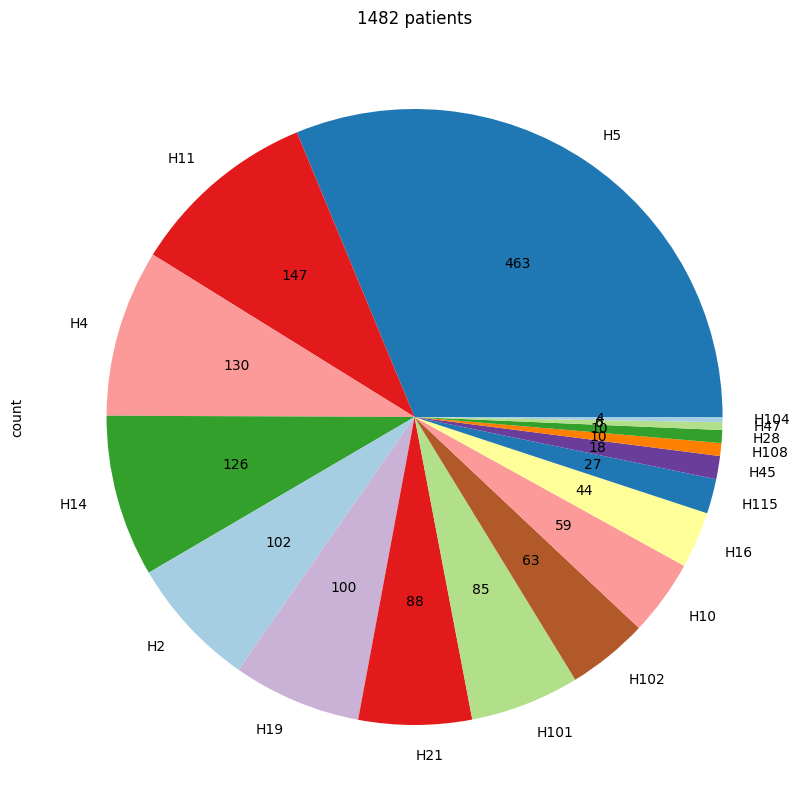

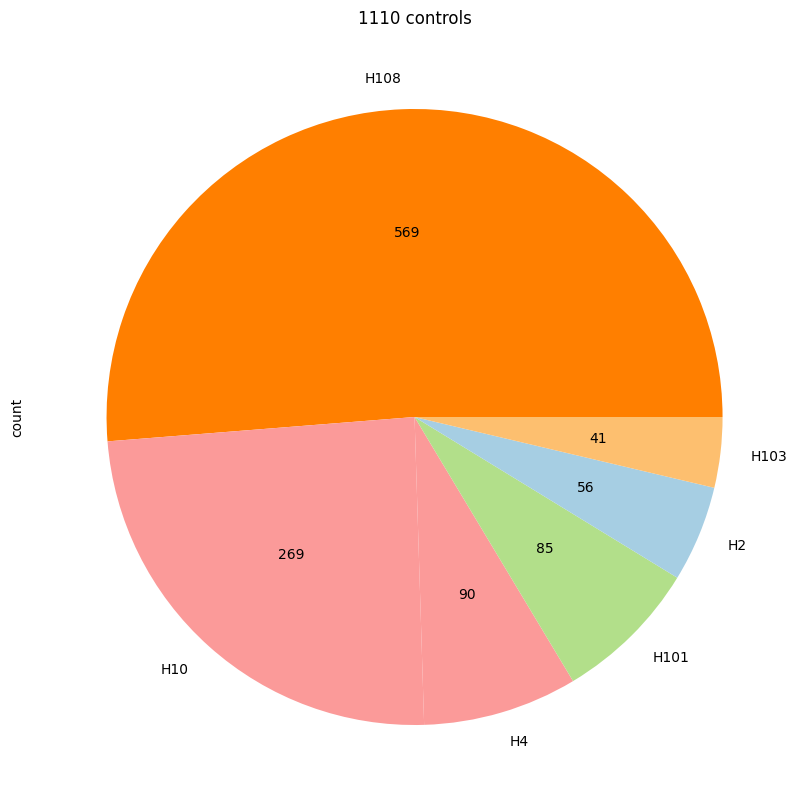

In [11]:
#breakdown of patients and controls per site
print(subdf.groupby(['site','patient_control'])['id'].count())

# Define a custom color mapping for each unique site
unique_sites = subdf['site'].unique()
site_colors = sns.color_palette("Paired", n_colors=len(unique_sites))
site_color_mapping = dict(zip(unique_sites, site_colors))

# Create a pie chart for patients
subdf_p = subdf[subdf['patient_control'] == 1]
site_counts_p = subdf_p['site'].value_counts()

fig, ax = plt.subplots(figsize=(10,10))
ax = site_counts_p.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_p)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_p.index],
)
plt.title(f'{num_patients} patients')
plt.show()


# Create a pie chart for controls
fig, ax = plt.subplots(figsize=(10,10))
subdf_c = subdf[subdf['patient_control'] == 2]
site_counts_c = subdf_c['site'].value_counts()
ax=site_counts_c.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_c)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_c.index]
)
plt.title(f'{num_controls} controls')
plt.show()

### Analyse histopathologies

In [12]:
data_dictionary = {1: 'FCD 1' ,
                   2: 'FCD 2A',
                   3: 'FCD 2B',
                   4: 'FCD 3A',
                   5: 'FCD 3B',
                   6: 'FCD 3C',
                   7: 'FCD 3D',
                   8: 'FCD 2 not otherwise specified',
                   9: 'FCD not otherwise specified',
                   10: 'Hippocampal sclerosis',
                   11: 'Hippocampal gliosis only',
                   12: 'Cortical gliosis only', 
                   13: 'DNET',
                   14: 'Ganglioglioma',
                   15: 'other low-grade tumour',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}

main_categories = {1: 'FCD' ,
                   2: 'FCD',
                   3: 'FCD',
                   4: 'FCD',
                   5: 'FCD',
                   6: 'FCD',
                   7: 'FCD',
                   8: 'FCD',
                   9: 'FCD',
                   10: 'HS and other',
                   11: 'HS and other',
                   12: 'Cortical gliosis only', 
                   13: 'LEAT',
                   14: 'LEAT',
                   15: 'LEAT',
                   16: 'Polymicrogyria',
                   17: 'Periventricular nodular heterotopia',
                   18: 'Cavernoma',
                   19: 'Non-specific pathology',
                   21: 'Normal',
                   22: 'Hypothalamic hamartoma',
                   23: 'Other',
}


def apply_category(row):
    if row['patient_control']==2:
        category = 'Healthy control'
    else:
        try:
            category = main_categories[int(row['histology'])]
        except:
            try:
                if '10' in row['histology']:
                    category = main_categories[10]
                else:
                    category = 'Other'
            except:
                category = 'Other'
    return category

list_categories = ['FCD', 'HS and other', 'Cortical gliosis only', 
                  'LEAT',
                   'Polymicrogyria', 'Periventricular nodular heterotopia',
                   'Cavernoma', 'Hypothalamic hamartoma', 'Non-specific pathology',
                    'Other', 'Healthy control',
                  ]

threshold_categories = {
                'FCD': 500,
                'HS and other': 300,
                'Cortical gliosis only' :100, 
                # 'DNET': 100,
                # 'Ganglioglioma': 100,
                # 'other low-grade tumour': 100,
                'LEAT': 300,
                'Polymicrogyria': 100,
                'Periventricular nodular heterotopia': 100,
                'Cavernoma' : 100,
                'Non-specific pathology' : 0,
                # 'Normal': 0,
                'Hypothalamic hamartoma': 100,
                'Other': 0,
                'Healthy control': 500,
}


patient_control  main_category                      
1.0              Cavernoma                                55
                 Cortical gliosis only                     6
                 FCD                                     506
                 HS and other                            376
                 Hypothalamic hamartoma                    6
                 LEAT                                    196
                 Non-specific pathology                   17
                 Normal                                   57
                 Other                                   256
                 Periventricular nodular heterotopia       2
                 Polymicrogyria                            5
2.0              Healthy control                        1110
Name: id, dtype: int64


/tmp/ipykernel_19226/4202871601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['main_category'] = subdf.apply(lambda row : apply_category(row), axis=1)
/tmp/ipykernel_19226/4202871601.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
/tmp/ipykernel_19226/4202871601.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


Text(0.5, 1.0, 'Distribution of histopathology')

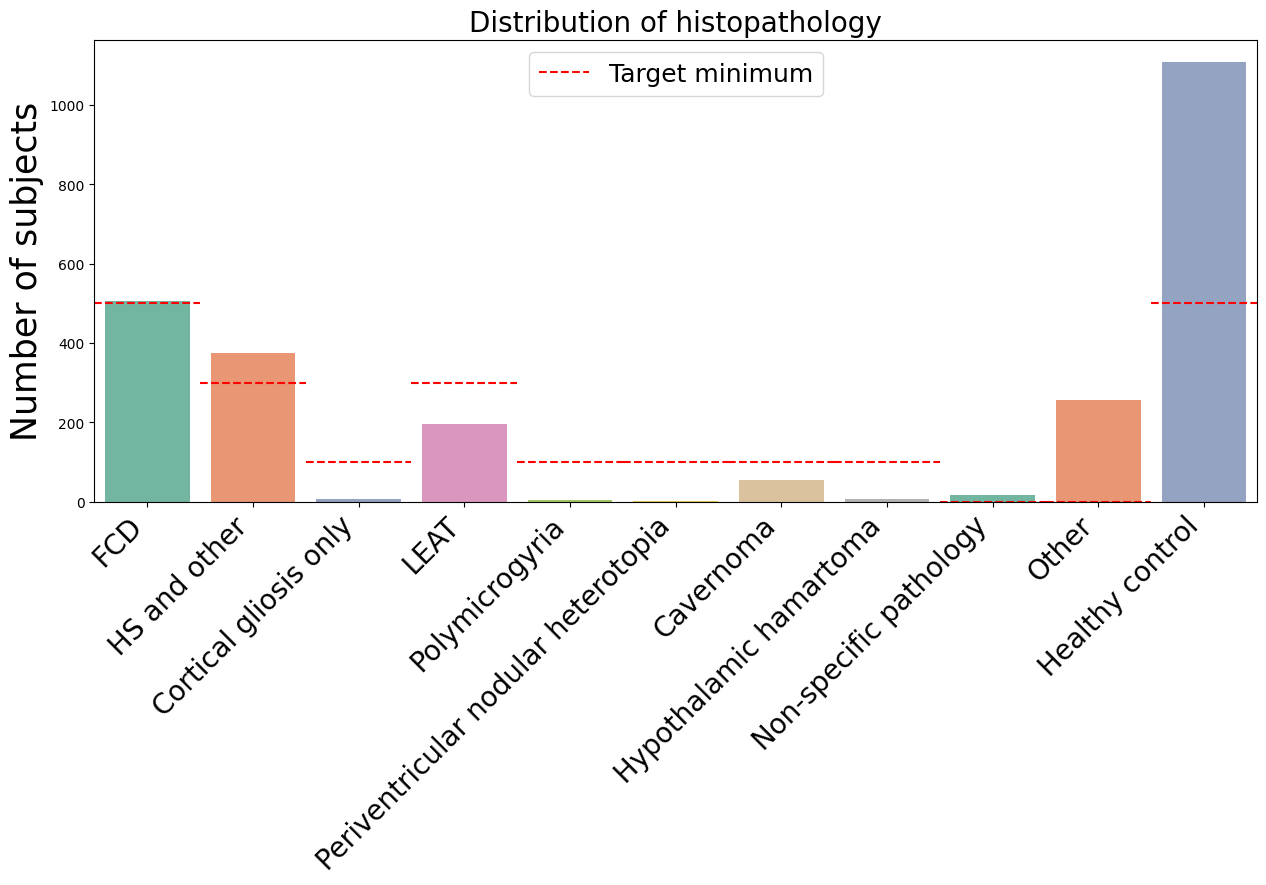

In [13]:
# recategorise histologies
subdf['main_category'] = subdf.apply(lambda row : apply_category(row), axis=1)

print(subdf.groupby(['patient_control','main_category'])['id'].count())

fig, ax = plt.subplots(figsize=(15,6))
g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
ax.set_ylabel('Number of subjects', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category

    ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Threshold ({category}: {threshold_value})', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax.legend([ax.get_legend_handles_labels()[0][0]],['Target minimum'], loc='upper center', fontsize=18)
ax.set_title('Distribution of histopathology', fontsize=20)

### look at lesion mask provided


In [14]:
print(subdf.groupby(['main_category', 'lesion_mask'])['id'].count())

main_category                        lesion_mask
Cavernoma                            0.0              1
                                     1.0             47
Cortical gliosis only                0.0              1
                                     1.0              4
FCD                                  0.0             88
                                     1.0            308
HS and other                         0.0             41
                                     1.0            247
Hypothalamic hamartoma               1.0              4
LEAT                                 0.0              1
                                     1.0            159
Non-specific pathology               1.0              3
Normal                               0.0              2
                                     1.0             38
Other                                0.0             44
                                     1.0            163
Periventricular nodular heterotopia  1.0              1

In [15]:
# check in MELD BIDS that lesion MASK exists

def harmonise_meld_name(name):
    split = name.split('_')  
    # exclude specific characters
    harmo_name= ''.join(split)
    
    return harmo_name

lesion_mask_MRI=[]
resection_mask_MRI = []
for i,row in subdf.iterrows():
    subject = 'sub-'+harmonise_meld_name(row['id'])
    site = row['site']
    files = glob.glob(f"/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_{site}/MELD_BIDS/{subject}/anat/*_lesion*.nii*") + glob.glob(f"/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_{site}/MELD_BIDS/{subject}/anat/*_roi*.nii*")+ glob.glob(f"/home/mathilde/Documents/RDS/MELD_FE/DATA/MELD_{site}/MELD_BIDS/{subject}/anat/*_resection*.nii*") 
    if len(files)>0:
        lesion_mask_MRI.append(1)
        if 'resection' in files[0]:
            resection_mask_MRI.append(1)
        else:
            resection_mask_MRI.append(0)
    else:
        lesion_mask_MRI.append(0)
        resection_mask_MRI.append(0)
subdf['lesion_mask_MRI']=lesion_mask_MRI
subdf['resection_mask_MRI']=resection_mask_MRI

/tmp/ipykernel_19226/4144029400.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['lesion_mask_MRI']=lesion_mask_MRI
/tmp/ipykernel_19226/4144029400.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['resection_mask_MRI']=resection_mask_MRI


In [16]:
print(subdf.groupby(['main_category','lesion_mask_MRI'])['id'].count())

main_category                        lesion_mask_MRI
Cavernoma                            0                     6
                                     1                    49
Cortical gliosis only                0                     2
                                     1                     4
FCD                                  0                   131
                                     1                   375
HS and other                         0                   127
                                     1                   249
Healthy control                      0                  1110
Hypothalamic hamartoma               0                     1
                                     1                     5
LEAT                                 0                     6
                                     1                   190
Non-specific pathology               0                     6
                                     1                    11
Normal                          

In [42]:
print(subdf.groupby(['site','lesion_mask_MRI'])['id'].count())

site  lesion_mask_MRI
H10   0                  328
H101  0                   85
      1                   85
H102  0                   21
      1                   42
H103  0                   41
H104  0                    1
      1                    3
H108  0                  572
      1                    7
H11   0                   80
      1                   67
H115  0                   27
H14   0                   37
      1                   89
H16   0                   13
      1                   31
H19   0                   47
      1                   53
H2    0                   64
      1                   94
H21   1                   88
H28   0                    2
      1                    8
H4    0                  122
      1                   98
H45   0                   18
H47   1                    6
H5    0                   10
      1                  453
Name: id, dtype: int64


/tmp/ipykernel_19226/1020338663.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
/tmp/ipykernel_19226/1020338663.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


Text(0.5, 1.0, 'Distribution of histopathology')

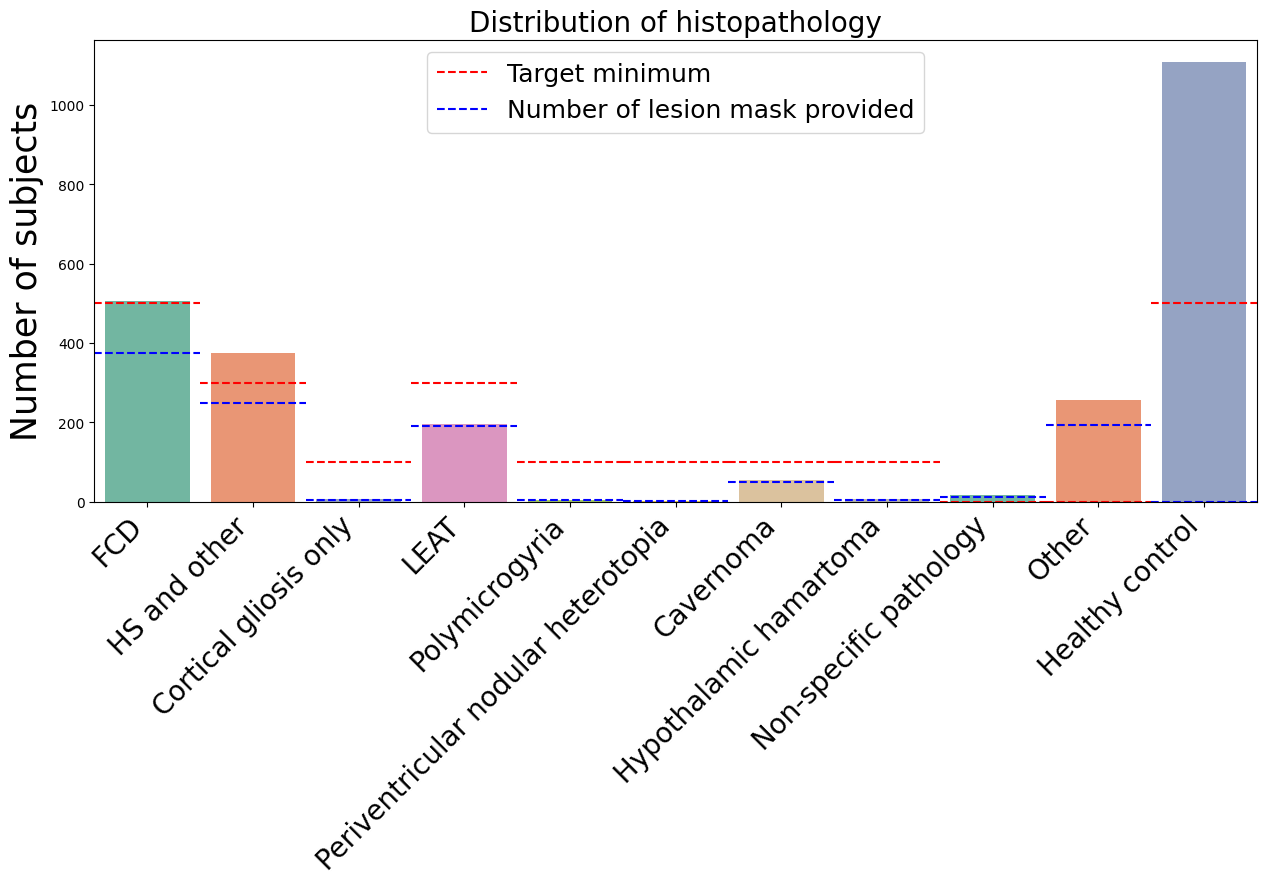

In [17]:
# add number of lesions mask provided

fig, ax = plt.subplots(figsize=(15,6))
g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2')
ax.set_ylabel('Number of subjects', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Target minimum', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# Add lines number of lesion mask provided above each category
for category in list_categories:
    number_lesion = subdf[subdf['main_category']==category]['lesion_mask_MRI'].sum()
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=number_lesion, color='blue', linestyle='--', label=f'Number of lesion mask provided', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax.legend([ax.get_legend_handles_labels()[0][0], ax.get_legend_handles_labels()[0][-1]],[ax.get_legend_handles_labels()[1][0], ax.get_legend_handles_labels()[1][-1]], loc='upper center', fontsize=18)
ax.set_title('Distribution of histopathology', fontsize=20)

### add qc info

In [18]:
file_qc = os.path.join(meld_bids_folder, 'summary_qc_auto_240219.csv')

df_qc = pd.read_csv(file_qc)
subdf_qc = pd.DataFrame()
subdf_qc['id'] = df_qc['subject'].values
subdf_qc['T1_available_QC'] = df_qc['T1 QC (0=to discard, 1=usable)'].values
subdf_qc['mask_available_QC'] = df_qc['mask QC ( 0=not correct, 1=correct , 2= seem correct but no postop to check )'].values


subdf = subdf.merge(subdf_qc, on='id', how='left')
subdf
    

,index,id,included,reason exclusion,old ID,redcap_data_access_group,site,patient_control,sex,radiology,...,Unnamed: 57,Unnamed: 58,reason_exclusion,Unnamed: 54,reason exlusion,main_category,lesion_mask_MRI,resection_mask_MRI,T1_available_QC,mask_available_QC
0,0,MELD_H2_P_0001,1,NaN,NaN,h2,H2,1.0,1.0,10.0,...,NaN,NaN,NaN,NaN,NaN,Other,0,0,1.0,NaN
1,1,MELD_H2_P_0002,1,NaN,NaN,h2,H2,1.0,1.0,14.0,...,NaN,NaN,NaN,NaN,NaN,HS and other,1,0,1.0,1.0
2,2,MELD_H2_P_0003,1,NaN,NaN,h2,H2,1.0,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,FCD,1,0,1.0,1.0
3,3,MELD_H2_P_0004,1,NaN,NaN,h2,H2,1.0,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,Other,1,0,1.0,2.0
4,4,MELD_H2_P_0005,1,NaN,NaN,h2,H2,1.0,0.0,23.0,...,NaN,NaN,NaN,NaN,NaN,Other,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,142,MELD_H11_P_0163,1,NaN,MELD_H11_P_0027,NaN,H11,1.0,1.0,19.0,...,NaN,NaN,NaN,NaN,NaN,LEAT,1,0,1.0,2.0
2588,143,MELD_H11_P_0164,1,NaN,MELD_H11_P_0028,NaN,H11,1.0,1.0,19.0,...,NaN,NaN,NaN,NaN,NaN,Cavernoma,1,0,1.0,2.0
2589,144,MELD_H11_P_0165,1,NaN,MELD_H11_P_0029,NaN,H11,1.0,0.0,19.0,...,NaN,NaN,NaN,NaN,NaN,LEAT,1,0,1.0,2.0
2590,145,MELD_H11_P_0166,1,NaN,MELD_H11_P_0030,NaN,H11,1.0,0.0,19.0,...,NaN,NaN,NaN,NaN,NaN,LEAT,1,0,1.0,2.0


/tmp/ipykernel_19226/2590872747.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf_postQC, order=list_categories, palette='Set2')
/tmp/ipykernel_19226/2590872747.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


Text(0.5, 1.0, 'Distribution of histopathology')

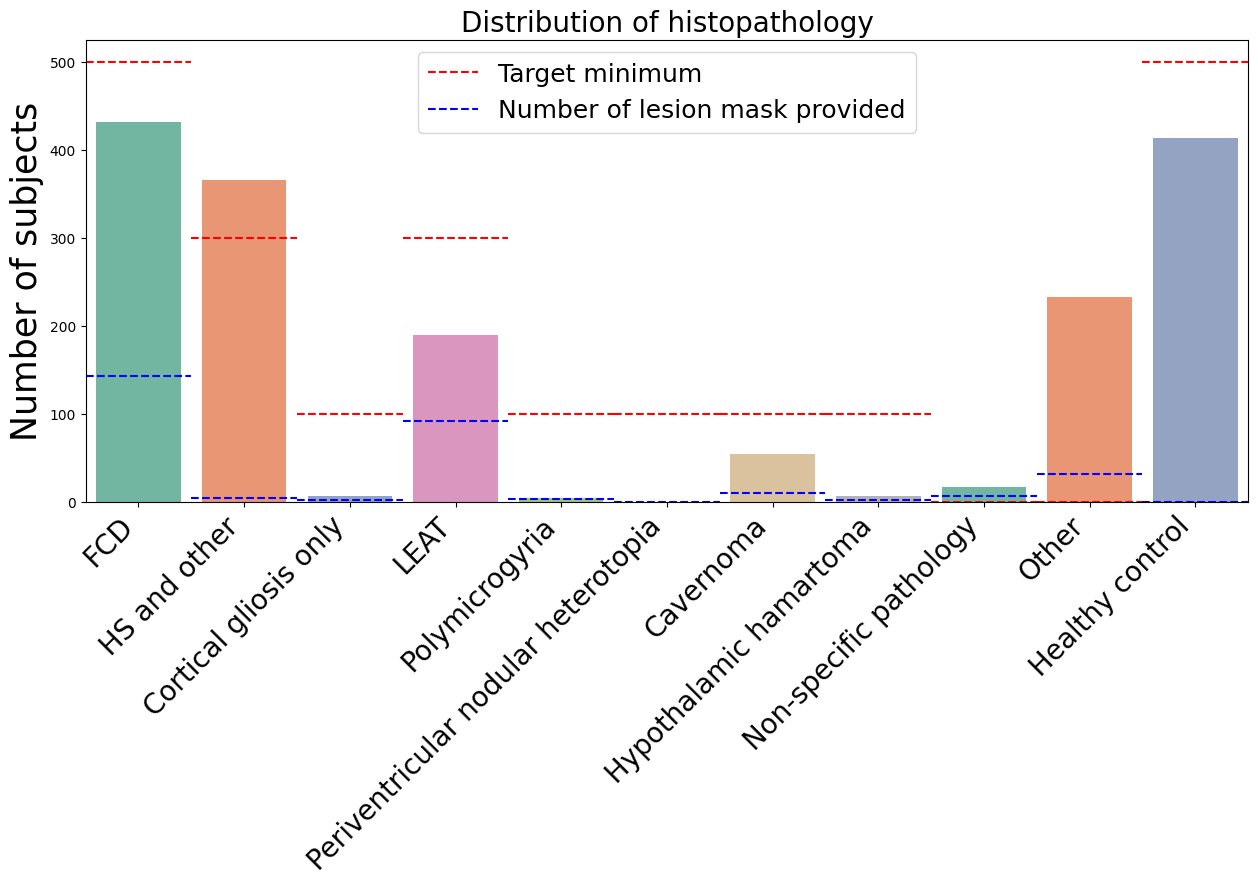

In [19]:
# plot number after QC

subdf_postQC = subdf[subdf['T1_available_QC']==1].reset_index()

# add number of lesions mask provided

fig, ax = plt.subplots(figsize=(15,6))
g=sns.countplot(x='main_category', data=subdf_postQC, order=list_categories, palette='Set2')
ax.set_ylabel('Number of subjects', fontsize=25)
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=threshold_value, color='red', linestyle='--', label=f'Target minimum', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# Add lines number of lesion mask provided above each category
for category in list_categories:
    number_lesion = len(subdf_postQC[(subdf_postQC['main_category']==category)&(subdf_postQC['mask_available_QC']==1)])
    category_index = list_categories.index(category)  # Get the index of the category
    ax.axhline(y=number_lesion, color='blue', linestyle='--', label=f'Number of lesion mask provided', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax.legend([ax.get_legend_handles_labels()[0][0], ax.get_legend_handles_labels()[0][-1]],[ax.get_legend_handles_labels()[1][0], ax.get_legend_handles_labels()[1][-1]], loc='upper center', fontsize=18)
ax.set_title('Distribution of histopathology', fontsize=20)


In [58]:
subdf_postQC

,level_0,index,id,included,reason exclusion,old ID,redcap_data_access_group,site,patient_control,sex,...,Unnamed: 58,reason_exclusion,Unnamed: 54,reason exlusion,main_category,lesion_mask_MRI,resection_mask_MRI,id_bids,T1_available_QC,mask_available_QC
0,0,0,MELD_H2_P_0001,1,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,NaN,NaN,Other,0,0,sub-MELDH2P0001,NaN,NaN
1,1,1,MELD_H2_P_0002,1,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,NaN,NaN,HS and other,1,0,sub-MELDH2P0002,NaN,NaN
2,2,2,MELD_H2_P_0003,1,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,NaN,NaN,FCD,1,0,sub-MELDH2P0003,NaN,NaN
3,3,3,MELD_H2_P_0004,1,NaN,NaN,h2,H2,1.0,1.0,...,NaN,NaN,NaN,NaN,Other,1,0,sub-MELDH2P0004,NaN,NaN
4,4,4,MELD_H2_P_0005,1,NaN,NaN,h2,H2,1.0,0.0,...,NaN,NaN,NaN,NaN,Other,1,0,sub-MELDH2P0005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,2587,142,MELD_H11_P_0163,1,NaN,MELD_H11_P_0027,NaN,H11,1.0,1.0,...,NaN,NaN,NaN,NaN,LEAT,1,0,sub-MELDH11P0163,NaN,NaN
2588,2588,143,MELD_H11_P_0164,1,NaN,MELD_H11_P_0028,NaN,H11,1.0,1.0,...,NaN,NaN,NaN,NaN,Cavernoma,1,0,sub-MELDH11P0164,NaN,NaN
2589,2589,144,MELD_H11_P_0165,1,NaN,MELD_H11_P_0029,NaN,H11,1.0,0.0,...,NaN,NaN,NaN,NaN,LEAT,1,0,sub-MELDH11P0165,NaN,NaN
2590,2590,145,MELD_H11_P_0166,1,NaN,MELD_H11_P_0030,NaN,H11,1.0,0.0,...,NaN,NaN,NaN,NaN,LEAT,1,0,sub-MELDH11P0166,NaN,NaN


## Create summary report

/tmp/ipykernel_21347/2120378112.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2', ax=ax4)
/tmp/ipykernel_21347/2120378112.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)


Text(0.5, 1.0, 'Histopathologies distribution')

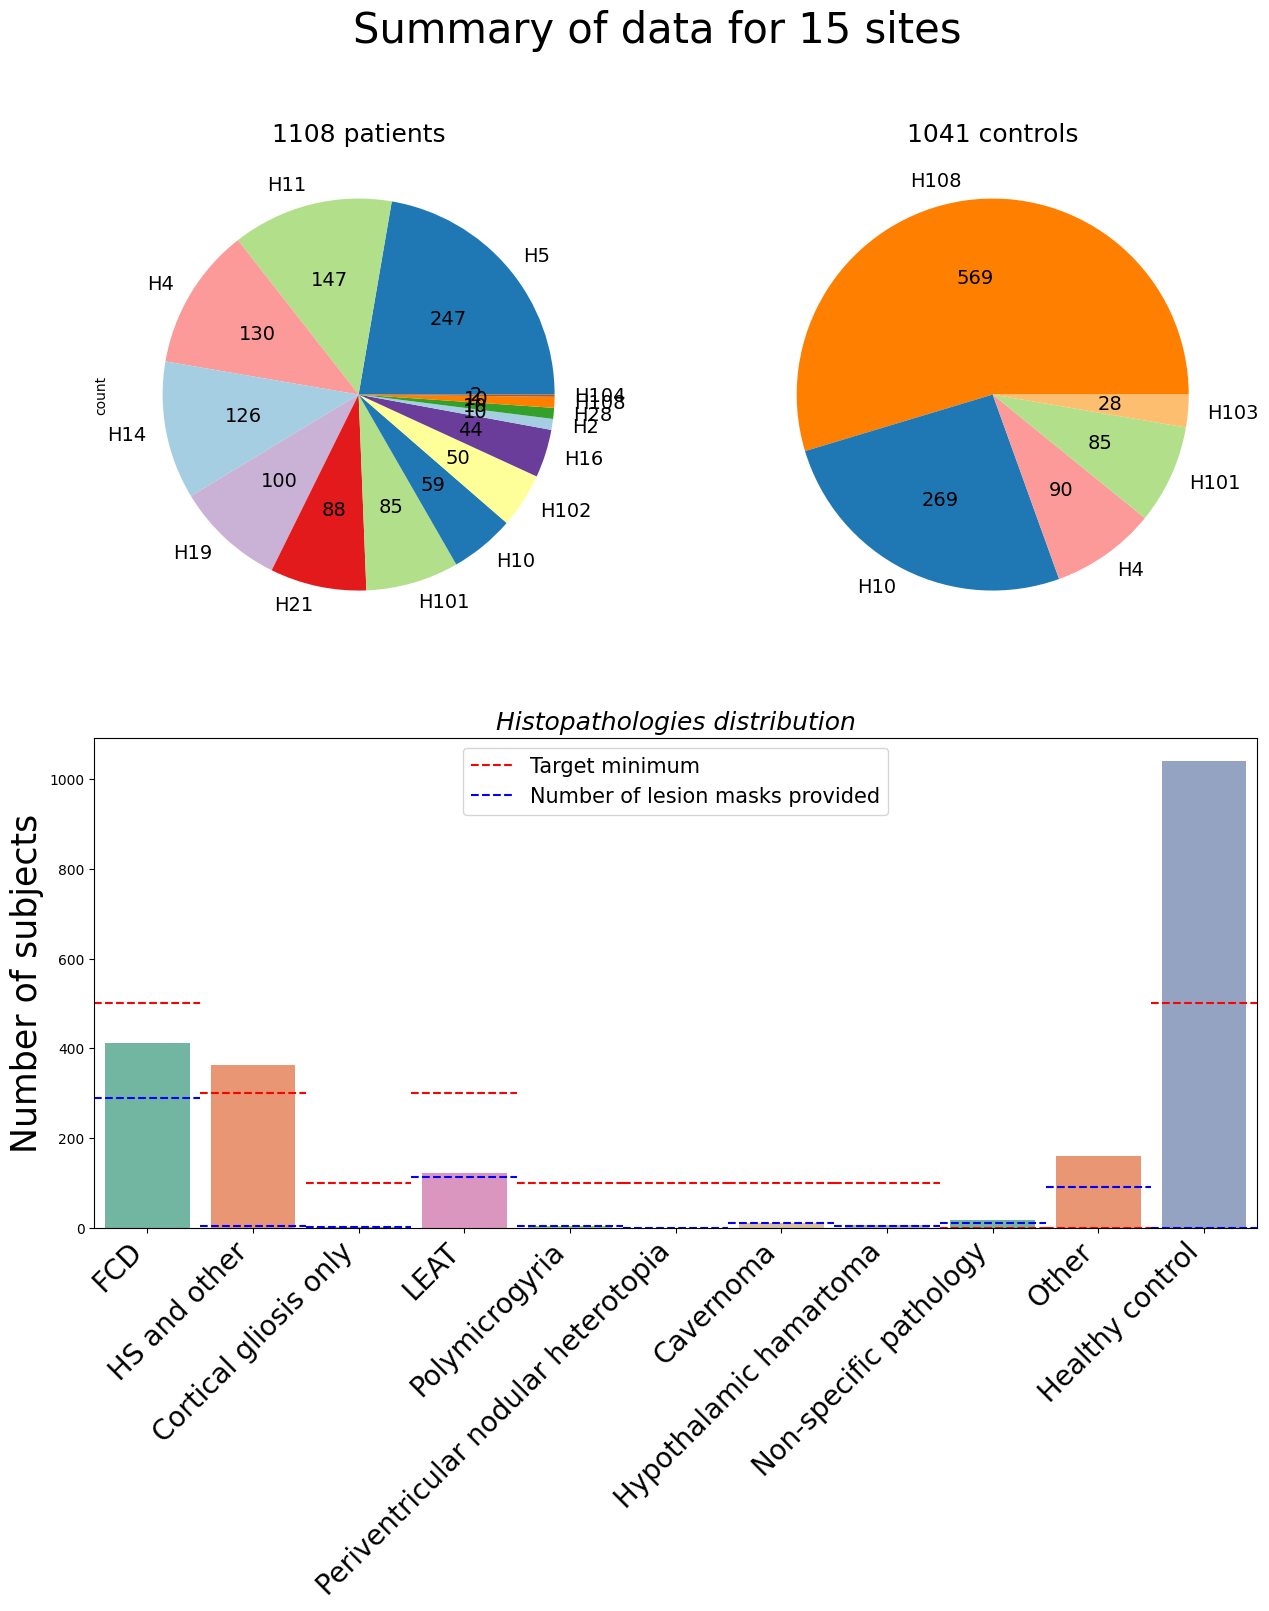

In [31]:
fig = plt.figure(figsize=(15,14))
fig.suptitle(f"Summary of data for {num_sites} sites", fontsize = 30)

gs = GridSpec(2, 2 , height_ratios=[2, 2], width_ratios=[1, 1], wspace=0.2)

##-------------------------------------------------------------
# plot patients and controls per sites
# Define a custom color mapping for each unique site
unique_sites = subdf['site'].unique()
site_colors = sns.color_palette("Paired", n_colors=len(unique_sites))
site_color_mapping = dict(zip(unique_sites, site_colors))

# Create a pie chart for patients
ax2 = fig.add_subplot(gs[0,0])
subdf_p = subdf[subdf['patient_control'] == 1]
site_counts_p = subdf_p['site'].value_counts()
site_counts_p.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_p)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_p.index], ax=ax2, fontsize=14,
)
ax2.set_xlabel('')
ax2.set_title(f'{num_patients} patients', fontsize=18)

# Create a pie chart for controls
ax3 = fig.add_subplot(gs[0,1])
subdf_c = subdf[subdf['patient_control'] == 2]
site_counts_c = subdf_c['site'].value_counts()
site_counts_c.plot.pie(
    autopct=lambda p: f'{int(np.round(p*len(subdf_c)/100))}',
    colors=[site_color_mapping[site] for site in site_counts_c.index], ax=ax3, fontsize=14,
)
ax3.set_ylabel('')
ax3.set_title(f'{num_controls} controls', fontsize=18)

##-------------------------------------------------------------
# plot graph histopathologies

ax4 = fig.add_subplot(gs[1,0:2])

g=sns.countplot(x='main_category', data=subdf, order=list_categories, palette='Set2', ax=ax4)
ax4.set_ylabel('Number of subjects', fontsize=25)
ax4.set_xlabel('')
ax4.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=20)

# Add threshold lines above each category
for category, threshold_value in threshold_categories.items():
    category_index = list_categories.index(category)  # Get the index of the category
    ax4.axhline(y=threshold_value, color='red', linestyle='--', label=f'Target minimum', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

# Add lines number of lesion mask provided above each category
for category in list_categories:
    number_lesion = subdf[subdf['main_category']==category]['lesion_mask_MRI'].sum()
    category_index = list_categories.index(category)  # Get the index of the category
    ax4.axhline(y=number_lesion, color='blue', linestyle='--', label=f'Number of lesion masks provided', xmin=category_index/len(list_categories), xmax=(category_index+1)/len(list_categories))

ax4.legend([ax4.get_legend_handles_labels()[0][0], ax4.get_legend_handles_labels()[0][-1]],[ax4.get_legend_handles_labels()[1][0], ax4.get_legend_handles_labels()[1][-1]], loc='upper center', fontsize=15)
ax4.set_title('Histopathologies distribution', loc='center',fontsize=18, style='italic')

# fig.savefig(save_file)



